In [8]:
%load_ext watermark
%watermark -a "Sebastian Raschka" -u -d -p numpy,pandas,matplotlib,sklearn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sebastian Raschka

Last updated: 2021-12-21

numpy     : 1.21.4
pandas    : 1.3.5
matplotlib: 3.5.1
sklearn   : 1.0.1



In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
import pandas as pd
import numpy as np


df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)


df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0, 
                     stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler


sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

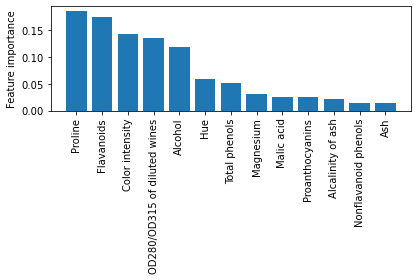

In [19]:
from sklearn.ensemble import RandomForestClassifier



forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

plt.ylabel('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

feat_labels = df_wine.columns[1:]
plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])

plt.tight_layout()
plt.savefig('feature-importance.pdf', dpi=300)
plt.show()

In [20]:
forest.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=1791095845),
 DecisionTreeClassifier(max_features='auto', random_state=2135392491),
 DecisionTreeClassifier(max_features='auto', random_state=946286476),
 DecisionTreeClassifier(max_features='auto', random_state=1857819720),
 DecisionTreeClassifier(max_features='auto', random_state=491263),
 DecisionTreeClassifier(max_features='auto', random_state=550290313),
 DecisionTreeClassifier(max_features='auto', random_state=1298508491),
 DecisionTreeClassifier(max_features='auto', random_state=2143362693),
 DecisionTreeClassifier(max_features='auto', random_state=630311759),
 DecisionTreeClassifier(max_features='auto', random_state=1013994432),
 DecisionTreeClassifier(max_features='auto', random_state=396591248),
 DecisionTreeClassifier(max_features='auto', random_state=1703301249),
 DecisionTreeClassifier(max_features='auto', random_state=799981516),
 DecisionTreeClassifier(max_features='auto', random_state=1666063943),
 DecisionTreeCl